# VGG Net

레이어 == 복잡도 == 파라미터<br>
Conv2d == size 유지<br>
Pooling == size 절반

## VGG11

In [ ]:
# VGG-11
import torch
import torch.nn as nn

tensor = torch.randn(size=(1, 3,  224, 224)) # B, C, H, W
tensor = nn.Conv2d(in_channels=3, out_channels=64, padding=1, kernel_size=3)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)(tensor)
print(tensor.shape)

tensor = nn.Conv2d(in_channels=64, out_channels=128, padding=1, kernel_size=3)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)(tensor)
print(tensor.shape)

tensor = nn.Conv2d(in_channels=128, out_channels=256, padding=1, kernel_size=3)(tensor)
tensor = nn.Conv2d(in_channels=256, out_channels=256, padding=1, kernel_size=3)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)(tensor)

print(tensor.shape)

tensor = nn.Conv2d(in_channels=256, out_channels=512, padding=1, kernel_size=3)(tensor)
tensor = nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)(tensor)

print(tensor.shape)

tensor = nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3)(tensor)
tensor = nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.MaxPool2d(kernel_size=2, padding=0, stride=2)(tensor)
print(tensor.shape)

tensor = tensor.view(tensor.shape[0], -1)
print(tensor.shape)

tensor = nn.Linear(in_features=tensor.shape[1], out_features=4096)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.Linear(in_features=4096, out_features=4096)(tensor)
tensor = nn.Tanh()(tensor)
tensor = nn.Linear(in_features=4096, out_features=1000)(tensor)
print(tensor.shape)

In [ ]:
class VGG11(nn.Module):
    def __init__(self):
        super(VGG11, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        )

        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, padding=1, kernel_size=3),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, padding=0, stride=2)
        )

        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=1000)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [ ]:
!pip install torchsummary

In [ ]:
from torchsummary import summary
tensor = torch.randn(size=(1, 3,  224, 224)) # B, C, H, W

model = VGG11()
summary(model, input_size=(3, 224, 224))

x = model.forward(tensor)
print(x.shape)
print(f'X: index={x.argmax().item()} x_pred={x.flatten()[x.argmax()].item()}')

## VGG13

In [85]:
# VGG13
import torch
import torch.nn as nn

class VGG13(nn.Module):
    def __init__(self):
        super(VGG13, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=1000)
        )

    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [86]:
from torchsummary import summary
tensor = torch.randn(size=(1, 3,  224, 224)) # B, C, H, W

model = VGG13()
summary(model, input_size=(3, 224, 224))

x = model.forward(tensor)
print(x.shape)
print(f'X: index={x.argmax().item()} x_pred={x.flatten()[x.argmax()].item()}')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## VGG19

In [92]:
class VGG19(nn.Module):
    def __init__(self):
        super(VGG19, self).__init__()

        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=64, out_channels=64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=128, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv4 = nn.Sequential(
            nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv5 = nn.Sequential(
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Linear(in_features=512*7*7, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=4096),
            nn.ReLU(),
            nn.Linear(in_features=4096, out_features=1000),
        )
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x

In [93]:
from torchsummary import summary
tensor = torch.randn(size=(1, 3,  224, 224)) # B, C, H, W

model = VGG19()
summary(model, input_size=(3, 224, 224))

x = model.forward(tensor)
print(x.shape)
print(f'X: index={x.argmax().item()} x_pred={x.flatten()[x.argmax()].item()}')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

## ConvBlock

In [1]:
import torch
import torch.nn as nn
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, n_layers):
        super(ConvBlock, self).__init__()

        # 처음 conv layer는 in_channels를 사용
        # self.layers = [
        #     nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
        #               kernel_size=3, padding=1),
        #     nn.ReLU()
        # ]

        # n_layers가 2 이상일 때 동작하는 코드
        # for _ in range(n_layers -1):
        #     self.layers.append(nn.Conv2d(in_channels=out_channels, out_channels=out_channels,
        #                                  kernel_size=3, padding=1))
        #     self.layers.append(nn.ReLU())

        self.layers = []
        for _ in range(n_layers):
            # if len(self.layers) != 0: in_channels = out_channels # 불필요
            self.layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                            kernel_size=3, padding=1))
            self.layers.append(nn.ReLU())
            in_channels = out_channels
            
        # 마지막 max pooling 추가
        self.layers.append(nn.MaxPool2d(kernel_size=2, stride=2))

        # list에 들어있는 layer를 풀어 nn.Sequential에 입력
        self.layers = nn.Sequential(*self.layers)

    def __call__(self, x):
        x = self.layers(x)
        return x
    
class VGG11CB(nn.Sequential):
    def __init__(self):
        super(VGG11CB, self).__init__()
        self.conv1 = ConvBlock(in_channels=3, out_channels=64, n_layers=1)
        self.conv2 = ConvBlock(in_channels=64, out_channels=128, n_layers=1)
        self.conv3 = ConvBlock(in_channels=128, out_channels=256, n_layers=2)
        self.conv4 = ConvBlock(in_channels=256, out_channels=512, n_layers=2)
        self.conv5 = ConvBlock(in_channels=512, out_channels=512, n_layers=2)

        self.classifier = nn.Sequential(
        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=1000),
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
class VGG13CB(nn.Sequential):
    def __init__(self):
        super(VGG13CB, self).__init__()
        self.conv1 = ConvBlock(in_channels=3, out_channels=64, n_layers=2)
        self.conv2 = ConvBlock(in_channels=64, out_channels=128, n_layers=2)
        self.conv3 = ConvBlock(in_channels=128, out_channels=256, n_layers=2)
        self.conv4 = ConvBlock(in_channels=256, out_channels=512, n_layers=2)
        self.conv5 = ConvBlock(in_channels=512, out_channels=512, n_layers=2)

        self.classifier = nn.Sequential(
        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=1000),
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x    

class VGG19CB(nn.Sequential):
    def __init__(self):
        super(VGG19CB, self).__init__()
        self.conv1 = ConvBlock(in_channels=3, out_channels=64, n_layers=2)
        self.conv2 = ConvBlock(in_channels=64, out_channels=128, n_layers=2)
        self.conv3 = ConvBlock(in_channels=128, out_channels=256, n_layers=4)
        self.conv4 = ConvBlock(in_channels=256, out_channels=512, n_layers=4)
        self.conv5 = ConvBlock(in_channels=512, out_channels=512, n_layers=4)

        self.classifier = nn.Sequential(
        nn.Linear(in_features=512*7*7, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=4096),
        nn.ReLU(),
        nn.Linear(in_features=4096, out_features=1000),
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x   

In [2]:
from torchsummary import summary

model = VGG19CB()
summary(model, input_size=(3, 224, 224))


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [6]:
block = ConvBlock(in_channels=3, out_channels=64, n_layers=3)
summary(block, input_size=(3, 100, 100))
# kernel size == (3 * 3) # 지정했던 값
# kernel channels == in_channels
# kernel cnt == out_channels
# weight = (kernel size) * (kernel channels) 
# bias = 1
# Param = (weight + bias) * (kernel cnt)

# weight = (3 * 3) * 3
# Param : ((3*3) * 3 + 1) * 64 = 1,792

# weight = (3 * 3) * 64
# Param : ((3*3) * 64 + 1) * 64 = 36,928

# weight = (3 * 3) * 64
# param : ((3*3) * 64 + 1) * 64 = 36,928

# input : 3 100 100
# output :
# 1: 64 100 100 1792 ((3*3) * 3 + 1) * 64
# 2: 64 100 100 0
# 3: 64 100 100 36928 ((3*3) * 64 + 1) * 64
# 4: 64 100 100 0
# 5: 64 100 100 36928 ((3*3) * 64 + 1) * 64
# 6: 64 50 50 0

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 100, 100]           1,792
              ReLU-2         [-1, 64, 100, 100]               0
            Conv2d-3         [-1, 64, 100, 100]          36,928
              ReLU-4         [-1, 64, 100, 100]               0
            Conv2d-5         [-1, 64, 100, 100]          36,928
              ReLU-6         [-1, 64, 100, 100]               0
         MaxPool2d-7           [-1, 64, 50, 50]               0
Total params: 75,648
Trainable params: 75,648
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.11
Forward/backward pass size (MB): 30.52
Params size (MB): 0.29
Estimated Total Size (MB): 30.92
----------------------------------------------------------------


## CIFAR-10

### VGG19 로 학습이 어렵다. 
iris (224 * 224) size로 만들어졌으므로 32 * 32 size 인 CIFAR-10 데이터는 Pooling에서 사이즈가 절반되면서 학습에 악영향을 준다.

In [18]:
import torch
import torch.nn as nn
class ConvBlock(nn.Module):
    def __init__(self, in_channels, out_channels, n_layers):
        super(ConvBlock, self).__init__()
        self.layers = []
        for _ in range(n_layers):
            self.layers.append(nn.Conv2d(in_channels=in_channels, out_channels=out_channels,
                                            kernel_size=3, padding=1))
            self.layers.append(nn.ReLU())
            in_channels = out_channels
        self.layers.append(nn.MaxPool2d(kernel_size=2, stride=2))
        self.layers = nn.Sequential(*self.layers)

    def __call__(self, x):
        x = self.layers(x) # type: ignore
        return x
    
class VGG(nn.Sequential):
    def __init__(self):
        super(VGG, self).__init__()
        self.conv1 = ConvBlock(in_channels=3, out_channels=64, n_layers=1)
        self.conv2 = ConvBlock(in_channels=64, out_channels=128, n_layers=1)
        self.conv3 = ConvBlock(in_channels=128, out_channels=256, n_layers=2)
        self.conv4 = ConvBlock(in_channels=256, out_channels=512, n_layers=2)
        self.conv5 = ConvBlock(in_channels=512, out_channels=512, n_layers=2)

        self.classifier = nn.Sequential(
        nn.Linear(in_features=512, out_features=1024),
        nn.ReLU(),
        nn.Linear(in_features=1024, out_features=1024),
        nn.ReLU(),
        nn.Linear(in_features=1024, out_features=10),
        )
        
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.conv5(x)
        x = x.view(x.shape[0], -1)
        x = self.classifier(x)
        return x
    
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.feature = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),

            nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1),
            nn.Tanh(),
            nn.AvgPool2d(kernel_size=2, stride=2),
            
            nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1),
        )
        self.classifier = nn.Sequential(   
            nn.Linear(in_features=120, out_features=84),
            nn.Tanh(),
            nn.Linear(in_features=84, out_features=10)
        )
    def forward(self, x):
        x = self.feature(x)
        x = x.view(x.shape[0], -1)
        return x


In [19]:
import torch
from torch.utils.data import DataLoader
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import torchvision
import torchvision.transforms as transforms


def get_dataset(BATCH_SIZE):
  transform = transforms.Compose(transforms=[transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
  trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
  trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)
  N_DATA = len(trainset)
  testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
  testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=False, num_workers=2)
  classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
  return trainloader, testloader, classes, N_DATA

def get_device():
  if torch.cuda.is_available():DEVICE = 'cuda'
  elif torch.backends.mps.is_available(): DEVICE = 'mps'
  else: DEVICE = 'cpu'
  return DEVICE

def train(data_loader, model, loss_function, BATCH_SIZE, N_DATA, optimizer, DEVICE):
  epoch_loss, n_corrects = 0., 0
  for X, y in data_loader:
    X, y = X.to(DEVICE), y.to(DEVICE)
    X = X.reshape(BATCH_SIZE, 3, 32, 32)

    pred = model.forward(X)
    loss = loss_function(pred, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    epoch_loss += loss.item() * len(X)
    pred = torch.argmax(pred, dim=1)
    n_corrects += (pred == y).sum().item()

  epoch_loss /= N_DATA
  epoch_acc = n_corrects / N_DATA

  return epoch_loss, epoch_acc

def vis_losses_accs(losses, accs):
  fig, axes = plt.subplots(2, 1, figsize=(5, 5))
  axes[0].plot(losses)
  axes[0].set_ylabel('BCELoss')
  axes[1].plot(accs)
  axes[1].set_ylabel('Accuracy')
  axes[1].set_xlabel('Epoch')

Files already downloaded and verified
Files already downloaded and verified


100%|██████████| 5/5 [08:14<00:00, 98.87s/it] 


Loss : 2.302814397201538, Accuracy : 0.09936



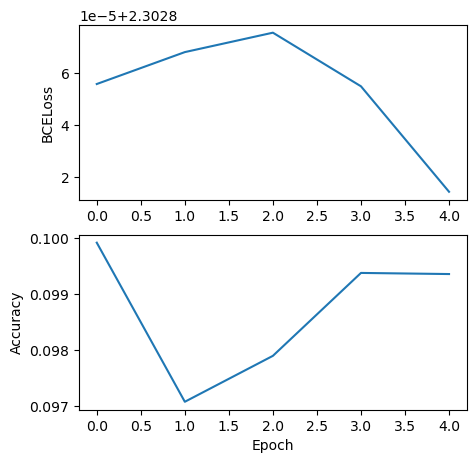

In [20]:
from torch.optim import SGD
from tqdm import tqdm

BATCH_SIZE = 16
EPOCHS = 5
LR = 0.01

trainloader, testloader, classes, N_DATA = get_dataset(BATCH_SIZE)
DEVICE = get_device()

model = VGG().to(DEVICE)
# model = LeNet().to(DEVICE)
loss_function = nn.CrossEntropyLoss()
optimizer = SGD(model.parameters(), lr=LR)

losses, accs = [], []
pbar = tqdm(range(EPOCHS))
for epoch in pbar:
  epoch_loss, epoch_acc = train(trainloader, model, loss_function, BATCH_SIZE, N_DATA, optimizer, DEVICE)
  losses.append(epoch_loss)
  accs.append(epoch_acc)
pbar.close()

vis_losses_accs(losses, accs)
print(f'Loss : {losses[-1]}, Accuracy : {accs[-1]}\n')


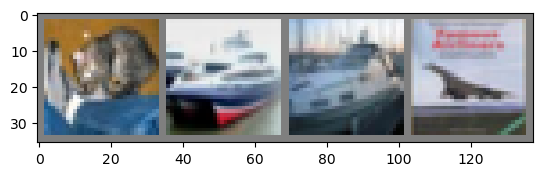

GroundTruth:  cat   ship  ship  plane
Predicted:  truck truck truck truck


In [16]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

outputs = model.forward(images.to(DEVICE))
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

## CIFAR-10 : tutorials

In [21]:
# https://tutorials.pytorch.kr/beginner/blitz/cifar10_tutorial.html#cifar10
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [22]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
net = Net()

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.203
[1,  4000] loss: 1.887
[1,  6000] loss: 1.716
[1,  8000] loss: 1.602
[1, 10000] loss: 1.545
[1, 12000] loss: 1.510
[2,  2000] loss: 1.442
[2,  4000] loss: 1.408
[2,  6000] loss: 1.365
[2,  8000] loss: 1.324
[2, 10000] loss: 1.328
[2, 12000] loss: 1.315
Finished Training


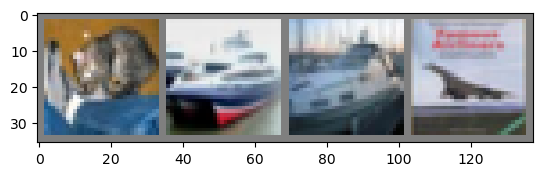

GroundTruth:  cat   ship  ship  plane


In [19]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))